# QQ Plots and EDA 

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
from plotnine.data import *
from sklearn.utils import shuffle
%matplotlib inline
sns.set() #Making seaborn the default styling 
data_path = '/Users/User/Desktop/Data/Datasets/Learning'
#data_path = '/Users/User/Desktop/Data/DataCamp-master/Intro_to_data'
os.chdir(data_path)
os.listdir()

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


['.DS_Store',
 '2008_all_states.csv',
 '2008_swing_states.csv',
 'aapl.csv',
 'airquality.csv',
 'albeck_gene_expression.mat',
 'all_medalists.csv',
 'all_pols.csv',
 'anscombe.csv',
 'austin_airport_departure_data_2015_july.csv',
 'auto-mpg 2.csv',
 'auto-mpg.csv',
 'automobiles.csv',
 'baseball.csv',
 'battledeath.xlsx',
 'bee_sperm.csv',
 'belmont.csv',
 'brics.csv',
 'Bronze.csv',
 'bronze_top5.csv',
 'cars.csv',
 'census.csv',
 'census.sqlite',
 'Chinook.sqlite',
 'clean_file.csv',
 'clean_file.xls',
 'co_cities.csv',
 'county.csv',
 'DEXUSEU.csv',
 'digits.csv',
 'disarea.dta',
 'disc_big.csv',
 'disc_new.csv',
 'disc_small.csv',
 'dob_job_application_filings_subset.csv',
 'ebola.csv',
 'email50.csv',
 'employees.sqlite',
 'evals.csv',
 'exchange.csv',
 'feb-sales-Hardware.csv',
 'feb-sales-Service.csv',
 'feb-sales-Software.csv',
 'female_literacy_fertility.csv',
 'fifa.csv',
 'finch_beaks_1975.csv',
 'finch_beaks_2012.csv',
 'fortis_beak_depth_heredity.csv',
 'frog_tongue.csv',

# Verizon Example
Repair times for two different customers groups:
 - ILEC = Incumbent Local Exchange Carrier i.e. Verizon
 - CLEC = Competing Local Exchange Carrier i.e. others
 Verizon is subject to substantial fines if the repair times for CLEC are substantially worse than for ILEC

### Descriptive statistics 

In [2]:
verizon = pd.read_csv("verizon.csv")
display(verizon.head())
display(verizon.groupby("Group").describe())

,Time,Group
0,17.50,ILEC
1,2.40,ILEC
2,0.00,ILEC
3,0.65,ILEC
4,22.23,ILEC


Time                                                         
        count       mean        std  min    25%    50%     75%     max
Group                                                                 
CLEC     23.0  16.509130  19.503576  0.0  5.425  14.33  20.715   96.32
ILEC   1664.0   8.411611  14.690039  0.0  0.730   3.59   7.080  191.60

### Histogram

/anaconda3/lib/python3.6/site-packages/plotnine/stats/stat_bin.py:90: UserWarning: 'stat_bin()' using 'bins = 173'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))


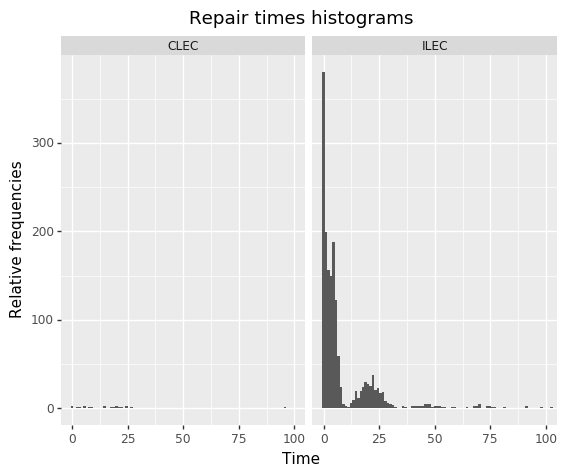

<ggplot: (7533964054)>

In [3]:
# Create histogram
ggplot(verizon, aes(x = "Time" )) + geom_histogram() + ylab("Relative frequencies") + facet_wrap("~ Group") + coord_cartesian(xlim = (0, 100)) + ggtitle("Repair times histograms")


### Density plot

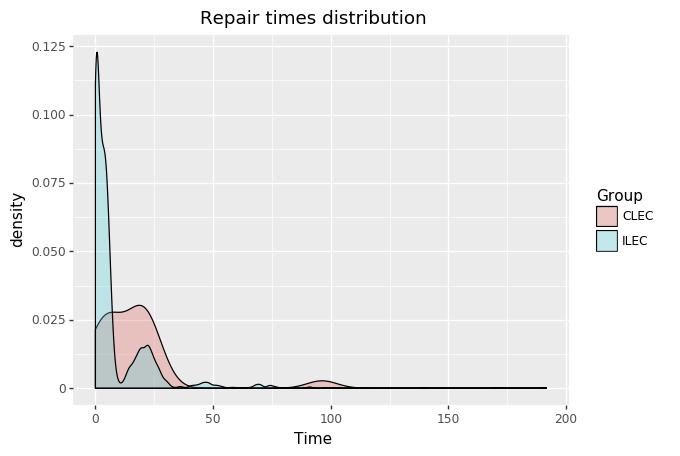

<ggplot: (-9223372036575922898)>

In [4]:
# Create histogram
ggplot(verizon, aes(x = "Time" , fill = "Group")) + geom_density(alpha = .3) \
+  ggtitle("Repair times distribution")


### Box plot

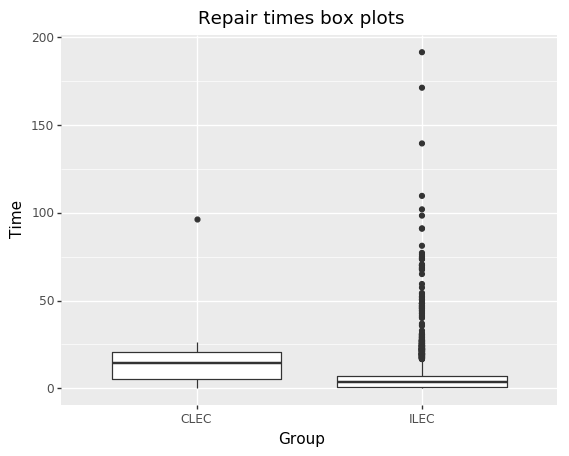

<ggplot: (277664246)>

In [5]:
ggplot(verizon, aes(x = "Group" , y = "Time")) + geom_boxplot() \
+  ggtitle("Repair times box plots")

### QQ plots to check normality
For all data points

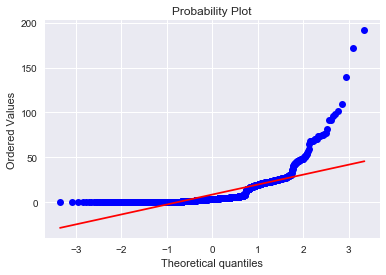

In [6]:
import scipy.stats as stats
stats.probplot(verizon.Time, dist = "norm", plot = plt)
plt.show()

For the two groups separately 

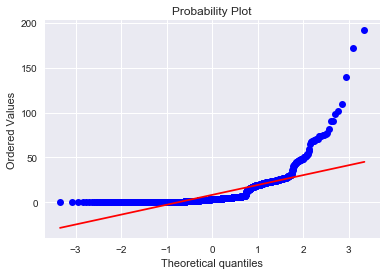

In [7]:
import statsmodels.api as sm
stats.probplot(verizon[verizon["Group"]=="ILEC"].Time, dist = "norm", plot = plt)
plt.show()

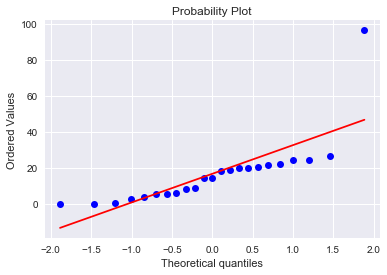

In [8]:
stats.probplot(verizon[verizon["Group"]=="CLEC"].Time, dist = "norm", plot = plt)
plt.show()

Normalizing the data first and using a different library

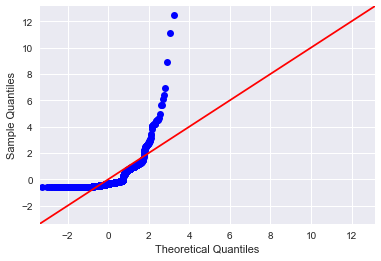

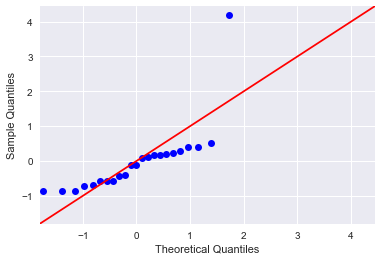

In [9]:
Z_ILEC = stats.mstats.zscore(verizon[verizon["Group"]=="ILEC"].Time)
Z_CLEC = stats.mstats.zscore(verizon[verizon["Group"]=="CLEC"].Time)
sm.qqplot(Z_ILEC, line = '45')
sm.qqplot(Z_CLEC, line = '45')
plt.show()